#### Даня, 3 октября

# Обучение модели и предсказания

In [2]:
import pandas as pd
import zipfile
from datetime import date
import datetime
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import random
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
# тренировочные данные

df_friday_train = pd.read_csv("./proceeded/train/friday_train.csv", sep = ";")
df_monday_train = pd.read_csv("./proceeded/train/monday_train.csv", sep = ";")
df_saturday_train = pd.read_csv("./proceeded/train/saturday_train.csv", sep = ";")
df_sunday_train = pd.read_csv("./proceeded/train/sunday_train.csv", sep = ";")
df_thursday_train = pd.read_csv("./proceeded/train/thursday_train.csv", sep = ";")
df_tuesday_train = pd.read_csv("./proceeded/train/tuesday_train.csv", sep = ";")
df_wednesday_train = pd.read_csv("./proceeded/train/wednesday_train.csv", sep = ";")


df_friday_train = df_friday_train.dropna()
df_monday_train = df_monday_train.dropna()
df_saturday_train = df_saturday_train.dropna()
df_sunday_train = df_sunday_train.dropna()
df_thursday_train = df_thursday_train.dropna()
df_tuesday_train = df_tuesday_train.dropna()
df_wednesday_train = df_wednesday_train.dropna()


# данные для предсказаний
test_df = pd.read_csv("./proceeded/test.csv", sep = ";")

# медианы по регионам
medians = pd.read_csv('./proceeded/medians.csv', sep = ";")

In [38]:
# Преобразование тренировочных и тестовых данных

X_mon = df_monday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_mon = df_monday_train[["y"]]

X_tue = df_tuesday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_tue = df_tuesday_train[["y"]]

X_wed = df_wednesday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_wed = df_wednesday_train[["y"]]

X_thu = df_thursday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_thu = df_thursday_train[["y"]]

X_fri = df_friday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_fri = df_friday_train[["y"]]

X_sat = df_saturday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_sat = df_saturday_train[["y"]]

X_sun = df_sunday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_sun = df_sunday_train[["y"]]

X_for_predictions = test_df.drop(['delivery_area_id', 'last_date'], axis = 1)
X_for_predictions = X_for_predictions.replace(np.inf, 1)

In [39]:
# индексы area_id (для склеивания с предсказаниями)
indexes_id = test_df["delivery_area_id"]

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
### По одной модели проверим точность прогнозов  

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_mon, y_mon, test_size=.20)

In [50]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [51]:
lr = LinearRegression().fit(X_train , y_train)
LR_Test_predict = lr.predict(X_test)
LR_MAPE= MAPE(y_test,LR_Test_predict)
print("MAPE: ",LR_MAPE)

MAPE:  y    16.715316
dtype: float64


# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [52]:
### обучение моделей

lr_mon = LinearRegression().fit(X_mon , y_mon)
lr_tue = LinearRegression().fit(X_tue , y_tue)
lr_wed = LinearRegression().fit(X_wed , y_wed)
lr_thu = LinearRegression().fit(X_thu , y_thu)
lr_fri = LinearRegression().fit(X_fri , y_fri)
lr_sat = LinearRegression().fit(X_sat , y_sat)
lr_sun = LinearRegression().fit(X_sun , y_sun)

In [53]:
# получение предсказаний

pred_mon = lr_mon.predict(X_for_predictions)
pred_tue = lr_tue.predict(X_for_predictions)
pred_wed = lr_wed.predict(X_for_predictions)
pred_thu = lr_thu.predict(X_for_predictions)
pred_fri = lr_fri.predict(X_for_predictions)
pred_sat = lr_sat.predict(X_for_predictions)
pred_sun = lr_sun.predict(X_for_predictions)

In [54]:
df_pred_mon = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_mon).tolist()
             })

df_pred_tue = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_tue).tolist()
             })

df_pred_wed = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_wed).tolist()
             })

df_pred_thu = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_thu).tolist()
             })

df_pred_fri = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_fri).tolist()
             })

df_pred_sat = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_sat).tolist()
             })

df_pred_sun = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_sun).tolist()
             })

In [55]:
medians = medians.fillna(medians.mean())

df_pred_mon = df_pred_mon.merge(medians, how = "inner", on = ["delivery_area_id"])
df_pred_tue = df_pred_tue.merge(medians, how = "inner", on = ["delivery_area_id"])
df_pred_wed = df_pred_wed.merge(medians, how = "inner", on = ["delivery_area_id"])
df_pred_thu = df_pred_thu.merge(medians, how = "inner", on = ["delivery_area_id"])
df_pred_fri = df_pred_fri.merge(medians, how = "inner", on = ["delivery_area_id"])
df_pred_sat = df_pred_sat.merge(medians, how = "inner", on = ["delivery_area_id"])
df_pred_sun = df_pred_sun.merge(medians, how = "inner", on = ["delivery_area_id"])

In [56]:
for df_help in [df_pred_mon, df_pred_tue, df_pred_wed,
                df_pred_thu, df_pred_fri, df_pred_sat, df_pred_sun]:
    df_help["prediction"] =  df_help["prediction_norm"] * df_help["median"]

In [57]:
df_pred_mon = df_pred_mon[["delivery_area_id", "prediction"]]
df_pred_tue = df_pred_tue[["delivery_area_id", "prediction"]]
df_pred_wed = df_pred_wed[["delivery_area_id", "prediction"]]
df_pred_thu = df_pred_thu[["delivery_area_id", "prediction"]]
df_pred_fri = df_pred_fri[["delivery_area_id", "prediction"]]
df_pred_sat = df_pred_sat[["delivery_area_id", "prediction"]]
df_pred_sun = df_pred_sun[["delivery_area_id", "prediction"]]

In [ ]:
df_pred_mon.to_csv("./proceeded/predictions/monday.csv", sep = ";", index = False)
df_pred_tue.to_csv("./proceeded/predictions/tuesday.csv", sep = ";", index = False)
df_pred_wed.to_csv("./proceeded/predictions/wednesday.csv", sep = ";", index = False)
df_pred_thu.to_csv("./proceeded/predictions/thursday.csv", sep = ";", index = False)
df_pred_fri.to_csv("./proceeded/predictions/friday.csv", sep = ";", index = False)
df_pred_sat.to_csv("./proceeded/predictions/saturday.csv", sep = ";", index = False)
df_pred_sun.to_csv("./proceeded/predictions/sunday.csv", sep = ";", index = False)

# Настя и Катя

In [3]:
df6_m = pd.read_csv("./proceeded/orders/mond.csv", sep = ";")
df6_tu = pd.read_csv("./proceeded/orders/tuesd.csv", sep = ";")
df6_wed = pd.read_csv("./proceeded/orders/wednesd.csv", sep = ";")
df6_thu = pd.read_csv("./proceeded/orders/thursd.csv", sep = ";")
df6_fri = pd.read_csv("./proceeded/orders/frid.csv", sep = ";")
df6_sat = pd.read_csv("./proceeded/orders/saturd.csv", sep = ";")
df6_sun = pd.read_csv("./proceeded/orders/sund.csv", sep = ";")

In [4]:
display(df6_m)
display(df6_tu)
display(df6_wed)
display(df6_thu)
display(df6_fri)
display(df6_sat)
display(df6_sun)

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,5,2.0,0,11,0.042449,2.500000
1,0,10,3.0,0,12,0.036028,3.333333
2,0,6,2.0,0,13,0.042694,3.000000
3,0,10,3.0,0,14,0.038929,3.333333
4,0,12,4.0,0,15,0.041638,3.000000
...,...,...,...,...,...,...,...
6482,592,2,1.0,0,16,0.028762,2.000000
6483,592,2,1.0,0,17,0.025505,2.000000
6484,592,4,2.0,0,18,0.043972,2.000000
6485,592,3,1.0,0,19,0.024114,3.000000


,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,2,2.0,1,10,0.041362,1.000000
1,0,14,4.0,1,11,0.038396,3.500000
2,0,14,4.0,1,12,0.043593,3.500000
3,0,7,3.0,1,13,0.034881,2.333333
4,0,13,4.0,1,14,0.044515,3.250000
...,...,...,...,...,...,...,...
6525,592,1,1.0,1,16,0.033340,1.000000
6526,592,1,1.0,1,17,0.033340,1.000000
6527,592,4,2.0,1,18,0.008536,2.000000
6528,592,1,1.0,1,19,0.031977,1.000000


,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,15,4.0,2,10,0.042993,3.75
1,0,6,3.0,2,11,0.036613,2.00
2,0,17,4.0,2,12,0.044807,4.25
3,0,5,2.0,2,13,0.044305,2.50
4,0,6,3.0,2,14,0.043229,2.00
...,...,...,...,...,...,...,...
6582,592,2,1.0,2,16,0.037904,2.00
6583,592,6,2.0,2,17,0.041822,3.00
6584,592,6,2.0,2,18,0.041176,3.00
6585,592,6,2.0,2,19,0.038320,3.00


,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,11,5.0,3,10,0.044926,2.200000
1,0,13,6.0,3,11,0.044510,2.166667
2,0,3,3.0,3,12,0.041611,1.000000
3,0,8,4.0,3,13,0.044392,2.000000
4,0,3,3.0,3,14,0.035721,1.000000
...,...,...,...,...,...,...,...
6483,592,1,1.0,3,15,0.030627,1.000000
6484,592,1,1.0,3,16,0.032522,1.000000
6485,592,1,1.0,3,17,0.032522,1.000000
6486,592,1,1.0,3,18,0.042913,1.000000


,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,4,2.0,4,11,0.032721,2.00
1,0,13,4.0,4,12,0.044406,3.25
2,0,18,6.0,4,13,0.041370,3.00
3,0,15,4.0,4,14,0.034498,3.75
4,0,15,4.0,4,15,0.037920,3.75
...,...,...,...,...,...,...,...
6692,592,1,1.0,4,16,0.019530,1.00
6693,592,1,1.0,4,17,0.017077,1.00
6694,592,1,1.0,4,18,0.011164,1.00
6695,592,1,1.0,4,19,0.010141,1.00


,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,12,5.0,5,10,0.024456,2.4
1,0,12,6.0,5,11,0.037133,2.0
2,0,6,4.0,5,12,0.029357,1.5
3,0,9,5.0,5,13,0.042962,1.8
4,0,6,4.0,5,14,0.036036,1.5
...,...,...,...,...,...,...,...
6545,592,1,1.0,5,17,0.029132,1.0
6546,592,1,1.0,5,18,0.008009,1.0
6547,592,1,1.0,5,19,0.003915,1.0
6548,592,3,2.0,5,20,0.036321,1.5


,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,12,5.0,6,10,0.044404,2.4
1,0,6,3.0,6,11,0.033479,2.0
2,0,9,5.0,6,12,0.042757,1.8
3,0,9,5.0,6,13,0.043263,1.8
4,0,6,3.0,6,14,0.042011,2.0
...,...,...,...,...,...,...,...
6403,592,2,2.0,6,17,0.029045,1.0
6404,592,1,1.0,6,18,0.005142,1.0
6405,592,2,2.0,6,19,0.035237,1.0
6406,592,3,2.0,6,20,0.040598,1.5


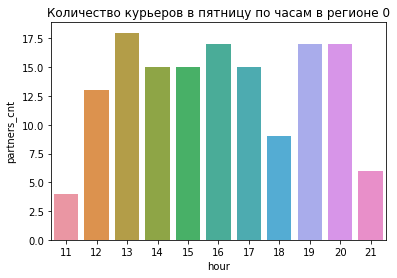

In [5]:
sn.barplot(x='hour', y='partners_cnt', data = df6_fri[df6_fri.delivery_area_id == 0]).set(title='Количество курьеров в пятницу по часам в регионе 0');

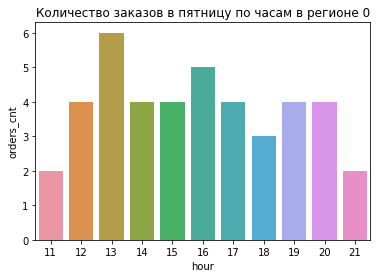

In [6]:
sn.barplot(x='hour', y='orders_cnt', data = df6_fri[df6_fri.delivery_area_id == 0]).set(title='Количество заказов в пятницу по часам в регионе 0');